<a href="https://colab.research.google.com/github/shresthar6/Movie-Recommendation-System/blob/main/Movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk

Reading the data in

In [ ]:
md = pd.read_csv('movie_metadata 2.csv')
md.shape

(5043, 28)

In [ ]:
md.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
md.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
ud = md.loc[:, ['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title','plot_keywords']]

In [ ]:
movies = ud.replace(np.NaN,"unknown")
movies.shape

(5043, 7)

In [ ]:
movies.drop_duplicates(subset="movie_title", keep='last',inplace=True)
movies.shape

(4917, 7)

There were 126 dublicate data.

In [ ]:
movies.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
plot_keywords    0
dtype: int64

Building a function to apply the text cleaning techniques like only using lower case letters, and not using any characeters

In [ ]:
import re
import string

def clean_text_func(text):
    '''Make text lowercase, removing special characters'''
    text = text.lower()
    # remove multiple whitespaces
    text = re.sub('\s+',' ', text)
    # remove characters that not words
    text=re.sub('[^a-zA-Z0-9]',' ',text)
    return text

clean_text = lambda x: clean_text_func(x)

In [ ]:
for col in movies.columns:
    movies[col+'_cleaned'] = movies[col].apply(clean_text)

In [ ]:
movies

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,plot_keywords,director_name_cleaned,actor_1_name_cleaned,actor_2_name_cleaned,actor_3_name_cleaned,genres_cleaned,movie_title_cleaned,plot_keywords_cleaned
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar,avatar|future|marine|native|paraplegic,james cameron,cch pounder,joel david moore,wes studi,action adventure fantasy sci fi,avatar,avatar future marine native paraplegic
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...,gore verbinski,johnny depp,orlando bloom,jack davenport,action adventure fantasy,pirates of the caribbean at world s end,goddess marriage ceremony marriage proposal pi...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre,bomb|espionage|sequel|spy|terrorist,sam mendes,christoph waltz,rory kinnear,stephanie sigman,action adventure thriller,spectre,bomb espionage sequel spy terrorist
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...,christopher nolan,tom hardy,christian bale,joseph gordon levitt,action thriller,the dark knight rises,deception imprisonment lawlessness police offi...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...,unknown,doug walker,doug walker,rob walker,unknown,documentary,star wars episode vii the force awakens,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy|Drama,Signed Sealed Delivered,fraud|postal worker|prison|theft|trial,scott smith,eric mabius,daphne zuniga,crystal lowe,comedy drama,signed sealed delivered,fraud postal worker prison theft trial
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime|Drama|Mystery|Thriller,The Following,cult|fbi|hideout|prison escape|serial killer,unknown,natalie zea,valorie curry,sam underwood,crime drama mystery thriller,the following,cult fbi hideout prison escape serial killer
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama|Horror|Thriller,A Plague So Pleasant,unknown,benjamin roberds,eva boehnke,maxwell moody,david chandler,drama horror thriller,a plague so pleasant,unknown
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy|Drama|Romance,Shanghai Calling,unknown,daniel hsia,alan ruck,daniel henney,eliza coupe,comedy drama romance,shanghai calling,unknown


Creating a new column called all_data combining all the columns

In [ ]:
movies['all_data'] = movies[movies.columns[7:]].apply(
    lambda x: ' '.join(x.astype(str)),
    axis=1
)
movies

In [ ]:
y = movies.columns[7:]
movies

**DATA VISUALIZATION**

In [ ]:
from wordcloud import WordCloud

def world_cloud_generate(image):

    wordcloud = WordCloud(background_color="white", max_words=500000,
                     contour_width=3, contour_color='steelblue', width=500,height=300,
                     repeat=False,include_numbers=False)

    # Generate a world cloud
    wordcloud.generate(image)

    return wordcloud

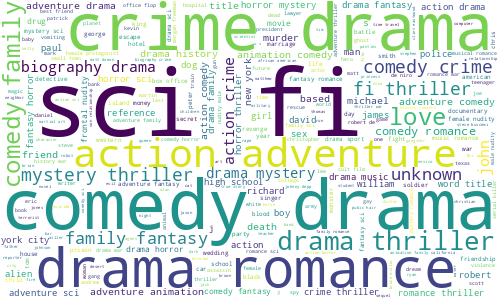

In [ ]:
image = ','.join(list(movies.all_data.values))
wordcloud1 = world_cloud_generate(image)

# Visualize the worldcloud
wordcloud1.to_image()

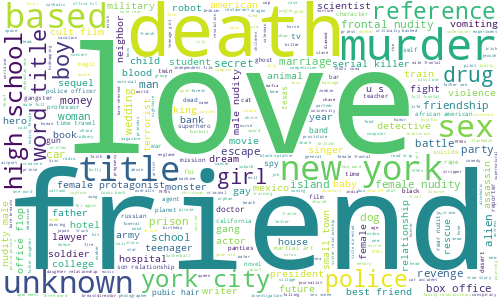

In [ ]:
image = ','.join(list(movies.plot_keywords_cleaned.values))
wordcloud1 = world_cloud_generate(image)

# Visualize the worldcloud
wordcloud1.to_image()

**Preparing Text Data for the Machine Learning Model**

---



Word counts based Tokenization method

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = movies.all_data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)

(4917, 16473)


# **KNN**

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def get_recommendation(query_movie_name, K):
    cleaned_query = clean_text_func(query_movie_name)
    unique_movie_titles = pd.Series(movies['movie_title_cleaned']).str.strip().unique()
    matching_titles = unique_movie_titles[pd.Series(unique_movie_titles).str.contains(cleaned_query)]

    matching_indices = [list(unique_movie_titles).index(title) for title in matching_titles]
    query_vectors = X[matching_indices]

    # measure the cosine similarity score between the query movie and all the movies in the dataset
    similarity_scores = cosine_similarity(query_vectors, X)

    top_indices = similarity_scores.argsort()[0][::-1][1:K+1]   #//gives index of similiar ones, 0 is the first row that stores index
    #recommended_movies = unique_movie_titles[top_indices]

    recommended_movies = movies.movie_title.iloc[top_indices].values

    print("Since you watched: ",query_movie_name,"\nWe recommend you: ")
    for moviename in recommended_movies:
        print('  ', moviename)

    #return list(recommended_movies)

In [ ]:
# test case
query_movie_name = "Avatar"
K = 5

get_recommendation(query_movie_name, K)

Since you watched:  Avatar 
We recommend you: 
   The New World 
   The Last Airbender 
   RoboCop 3 
   Mystery Men 
   Aliens 


In [ ]:
# test case
query_movie_name = "harry potter"
K = 10

get_recommendation(query_movie_name, K)

Since you watched:  harry potter 
We recommend you: 
   Harry Potter and the Order of the Phoenix 
   Harry Potter and the Prisoner of Azkaban 
   Harry Potter and the Chamber of Secrets 
   Harry Potter and the Goblet of Fire 
   Harry Potter and the Deathly Hallows: Part I 
   Harry Potter and the Deathly Hallows: Part II 
   Harry Potter and the Sorcerer's Stone 
   Osmosis Jones 
   Alice in Wonderland 
   Wild Target 


In [ ]:
# test case
K = 10 #-- list first K recommended movie names

query = 'Avengers'

get_recommendation(query, K)

Since you watched:  Avengers 
We recommend you: 
   Captain America: Civil War 
   The Avengers 
   Thor 
   Spawn 
   Captain America: The Winter Soldier 
   Iron Man 2 
   The Incredible Hulk 
   Captain America: The First Avenger 
   Serenity 
   Superman II 


# **LDA**

In [ ]:
import gensim
# Convert sparse matrix to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
# Mapping from word vocabulary to dictionary
id2word = dict((v, k) for k, v in vect.vocabulary_.items())

NameError: ignored

In [ ]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a variable named 'documents' containing your text data

# Initialize the vectorizer
vect = TfidfVectorizer()

# Fit and transform the text data
Z = vect.fit_transform(movies.all_data)

# Convert sparse matrix to gensim corpus
corpus = gensim.matutils.Sparse2Corpus(Z, documents_columns=False)

# Mapping from word vocabulary to dictionary
id2word = dict((v, k) for k, v in vect.vocabulary_.items())

In [ ]:
# use the gensim.models.ldamodel.LdaModel constructor to estimate
# LDAl model parameters on the corpus, and save to the variable 'ldamodel'
n_topics = 10 #--hyperparameter can be adjusted to get a better performance
ldamodel = gensim.models.LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      passes=2,
                                      random_state=22,
                                      num_topics=n_topics,
                                      workers=4)

In [ ]:
# for each topic, explore the words occuring in that topic and its relative weight
for idx, topic in ldamodel.print_topics(num_topics=n_topics, num_words=20):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

Topic: 0 
Words: 0.004*"drama" + 0.003*"the" + 0.003*"comedy" + 0.003*"action" + 0.002*"family" + 0.002*"adventure" + 0.002*"thriller" + 0.002*"romance" + 0.002*"fantasy" + 0.002*"crime" + 0.002*"of" + 0.002*"horror" + 0.002*"sci" + 0.002*"fi" + 0.002*"john" + 0.001*"unknown" + 0.001*"mystery" + 0.001*"in" + 0.001*"michael" + 0.001*"david"


Topic: 1 
Words: 0.004*"drama" + 0.004*"the" + 0.004*"comedy" + 0.003*"thriller" + 0.003*"romance" + 0.002*"action" + 0.002*"adventure" + 0.002*"of" + 0.002*"sci" + 0.002*"fi" + 0.002*"fantasy" + 0.002*"family" + 0.002*"john" + 0.002*"crime" + 0.002*"in" + 0.002*"horror" + 0.002*"mystery" + 0.001*"michael" + 0.001*"richard" + 0.001*"animation"


Topic: 2 
Words: 0.004*"drama" + 0.004*"the" + 0.003*"comedy" + 0.003*"thriller" + 0.003*"romance" + 0.003*"action" + 0.002*"adventure" + 0.002*"crime" + 0.002*"fantasy" + 0.002*"in" + 0.002*"horror" + 0.002*"of" + 0.002*"family" + 0.001*"mystery" + 0.001*"love" + 0.001*"fi" + 0.001*"sci" + 0.001*"unknown" 

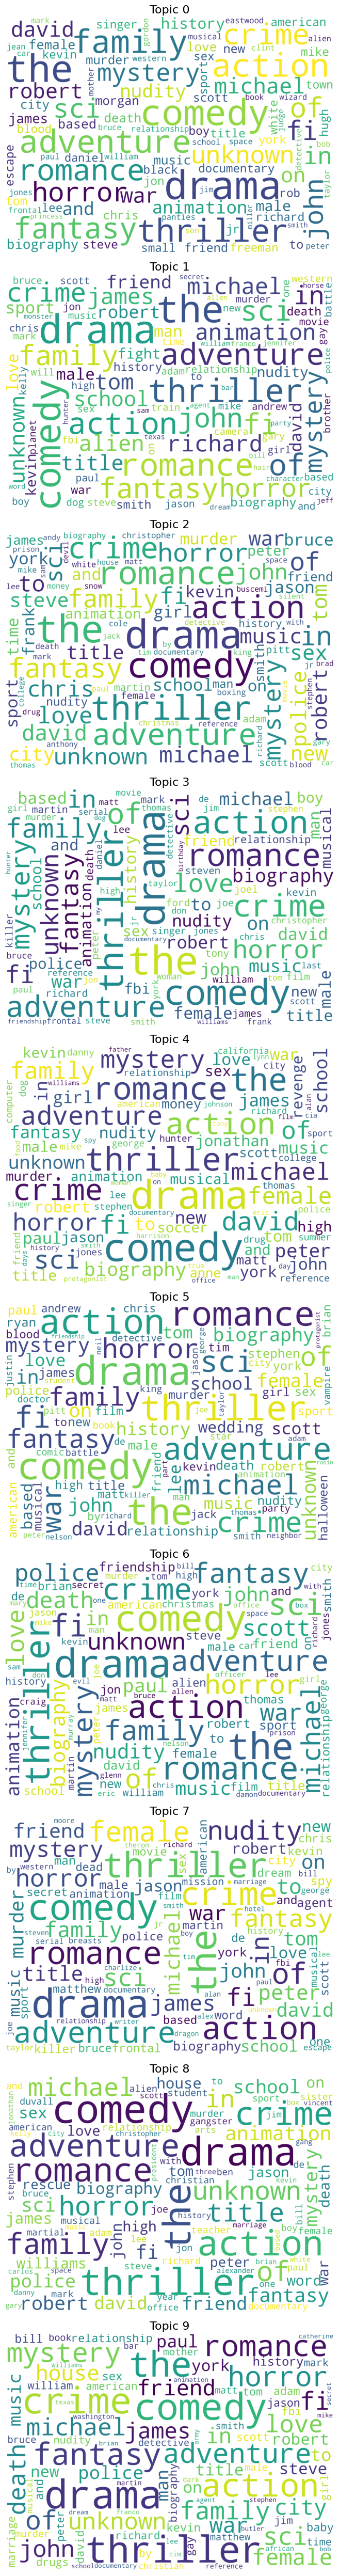

In [ ]:
#from wordcloud import WordCloud, STOPWORDS
cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=5000,
                  contour_width=3,
                  contour_color='steelblue')


topics = ldamodel.show_topics(num_words=100, formatted=False, num_topics=n_topics)


#fig, axes = plt.subplots(round(len(topics)/2)+1,2, figsize=(12,100), sharex=True, sharey=True)
fig, axes = plt.subplots(len(topics),1, figsize=(12,50), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    if i < len(topics):
        fig.add_subplot(ax)
        cloud.generate_from_frequencies(dict(topics[i][1]), max_font_size=300)
        plt.imshow(cloud)
        plt.title('Topic ' + str(i), fontdict=dict(size=16))
        plt.axis('off')
        plt.margins(x=0, y=0)
        plt.tight_layout()
    else:
        ax.axis('off')

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title, num_topics):
    fig, axes = plt.subplots(2, 5, figsize=(30, 150), sharex=True)
    axes = axes.flatten()

    topics = model.show_topics(num_words=n_top_words, formatted=False, num_topics=num_topics)
    for topic_idx, topic in topics:
        topic = dict(topic)
        top_features = list(topic.keys())
        weights = list(topic.values())
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

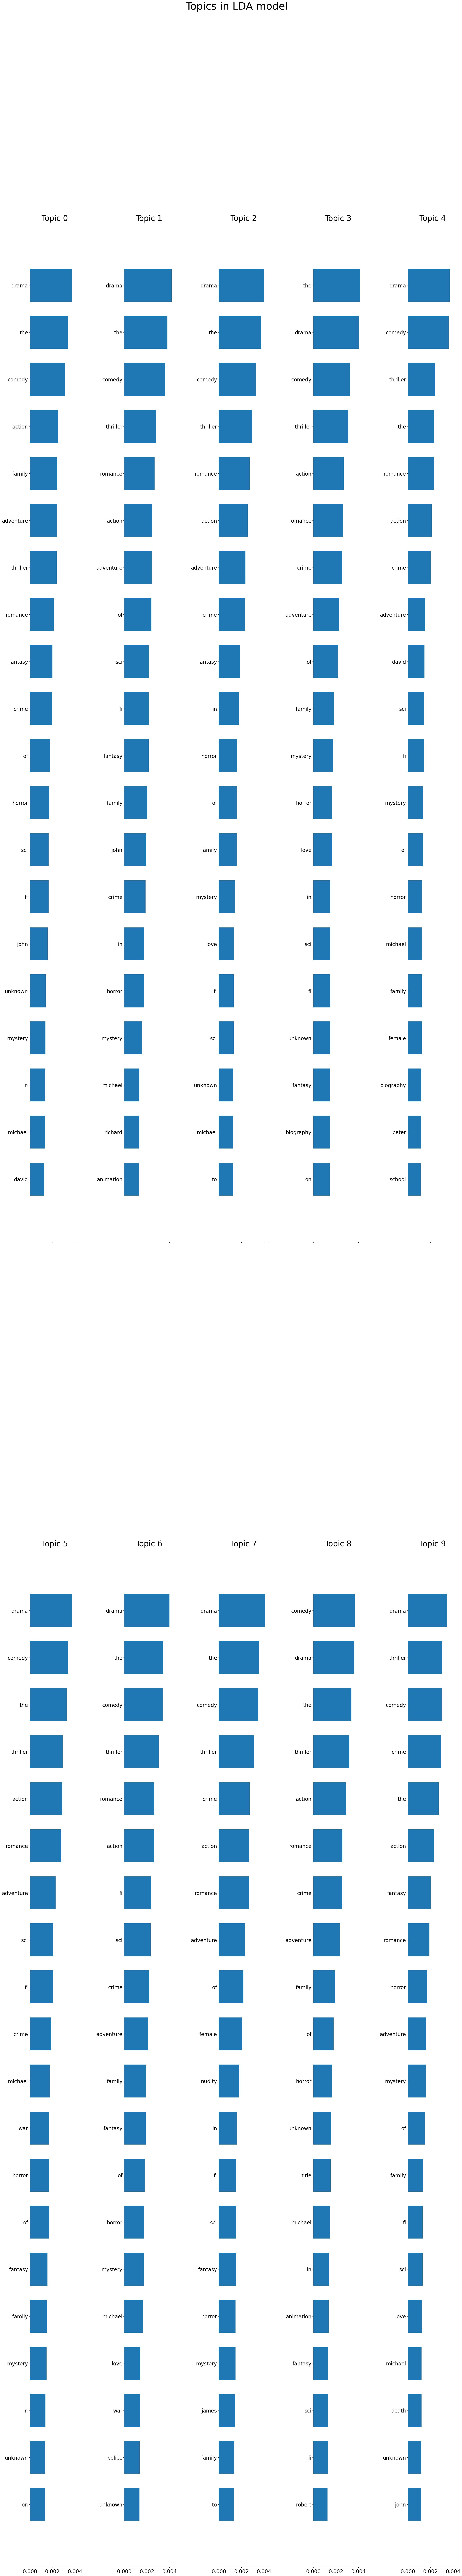

In [ ]:
# get all the distinct words as feature
feature_names = vect.get_feature_names_out()
plot_top_words(ldamodel,feature_names,20, "Topics in LDA model",n_topics)

In [ ]:
# Query function
def querying_movie(query, movie_range):
    # Query Similarity Weights -- hyperparameters can be changed
    w_text = .3

    q_vector = vect.transform([' '.join(query)])

    '''Calculates Query Similarity Scores against movie title.
        This part can be enhanced/improved later'''
    title_tfidf = vect.transform(movies.all_data)
    final_scores = title_tfidf * q_vector.T * w_text

    sorted_index = pd.Series(final_scores.toarray().T[0]).sort_values(ascending = False)[movie_range[0]:movie_range[1]].index

    # display the query result
    print('Search Query: {}\n'.format(query))
    for i, index in enumerate(sorted_index, movie_range[0]):
        print('Movie Rank: {}\t'.format(i+1),movies.loc[index, 'movie_title'],'\n')

In [ ]:
# test case 1
query = ['avatar']
movie_range=(0,5)#-- list first three recommended recipes
querying_movie(query, movie_range)

Search Query: ['avatar']

Movie Rank: 1	 Avatar  

Movie Rank: 2	 Thor: The Dark World  

Movie Rank: 3	 20,000 Leagues Under the Sea  

Movie Rank: 4	 Poltergeist III  

Movie Rank: 5	 Thunderball  

